<a href="https://colab.research.google.com/github/oxerz8/Real-Estate-Data-Analysis-and-price-prediction/blob/main/House%20price%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
#pd.set_option("display.max_rows", None, "display.max_columns", None)        #To display the full table
%matplotlib inline 
#don't need plt.show()

## Loading Dataset

In [170]:
train_data = pd.read_csv('train.csv')
Xtest = pd.read_csv('test.csv')
#Ytest = pd.read_csv('sample_submission.csv')

In [171]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [172]:
Xtest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Splitting SalePrice from the original dataset

In [173]:
Xtrain = train_data.drop(['SalePrice'],axis='columns')
Ytrain = train_data['SalePrice']

Dropping Id column as it is unnecessary for analysis

In [174]:
Xtrain = train_data.drop(['Id'],axis='columns')
Xtest = Xtest.drop(['Id'],axis='columns')

In [175]:
Xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Observations

In [176]:
Xtrain.shape, Ytrain.shape

((1460, 80), (1460,))

In [177]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Summary Statistics

In [178]:
Xtrain.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We check the deviation of mean from the 50th quantile

In [179]:
(Xtrain.mean(numeric_only=True) - Xtrain.quantile(0.5, numeric_only=True))/Xtrain.mean(numeric_only=True)

MSSubClass       0.121223
LotFrontage      0.014989
LotArea          0.098730
OverallQual      0.016283
OverallCond      0.103194
YearBuilt       -0.000879
YearRemodAdd    -0.004602
MasVnrArea       1.000000
BsmtFinSF1       0.135560
BsmtFinSF2       1.000000
BsmtUnfSF        0.158205
TotalBsmtSF      0.062349
1stFlrSF         0.065048
2ndFlrSF         1.000000
LowQualFinSF     1.000000
GrLivArea        0.033959
BsmtFullBath     1.000000
BsmtHalfBath     1.000000
FullBath        -0.277899
HalfBath         1.000000
BedroomAbvGr    -0.046595
KitchenAbvGr     0.044503
TotRmsAbvGrd     0.079445
Fireplaces      -0.631285
GarageYrBlt     -0.000755
GarageCars      -0.131783
GarageArea      -0.014842
WoodDeckSF       1.000000
OpenPorchSF      0.464212
EnclosedPorch    1.000000
3SsnPorch        1.000000
ScreenPorch      1.000000
PoolArea         1.000000
MiscVal          1.000000
MoSold           0.050921
YrSold          -0.000092
SalePrice        0.099055
dtype: float64

Then we check the deviation of 75th quantile from the max values.


In [180]:
(Xtrain.max(numeric_only=True) - Xtrain.quantile(0.75, numeric_only=True))/Xtrain.max(numeric_only=True)

MSSubClass       0.631579
LotFrontage      0.744409
LotArea          0.946101
OverallQual      0.300000
OverallCond      0.333333
YearBuilt        0.004975
YearRemodAdd     0.002985
MasVnrArea       0.896250
BsmtFinSF1       0.873804
BsmtFinSF2       1.000000
BsmtUnfSF        0.654110
TotalBsmtSF      0.787520
1stFlrSF         0.703485
2ndFlrSF         0.647458
LowQualFinSF     1.000000
GrLivArea        0.685085
BsmtFullBath     0.666667
BsmtHalfBath     1.000000
FullBath         0.333333
HalfBath         0.500000
BedroomAbvGr     0.625000
KitchenAbvGr     0.666667
TotRmsAbvGrd     0.500000
Fireplaces       0.666667
GarageYrBlt      0.003980
GarageCars       0.500000
GarageArea       0.593794
WoodDeckSF       0.803967
OpenPorchSF      0.875686
EnclosedPorch    1.000000
3SsnPorch        1.000000
ScreenPorch      1.000000
PoolArea         1.000000
MiscVal          1.000000
MoSold           0.333333
YrSold           0.000498
SalePrice        0.716556
dtype: float64

### Key observations
- Attributes such as PoolArea, MiscVal, BasementFullBath etc have a strong deviation of the mean from the median,
which means the data may not be normally distributed.
- Attributes such as BsmtFinSF2 and BsmtHalfBath show a large difference between the 75th percentile and the max value,
suggesting the existance of outliers in the distributions.

## Understanding target variable

In [181]:
Ytrain.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [182]:
Ytrain.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

###

### Key observations
We see target variable SalePrice is continuous.

The mean is close to the 50th quantile while the difference between 75th 

quantile and max is huge implying the presence of outliers.

# Data Visualization

## To check NULL values

<Axes: >

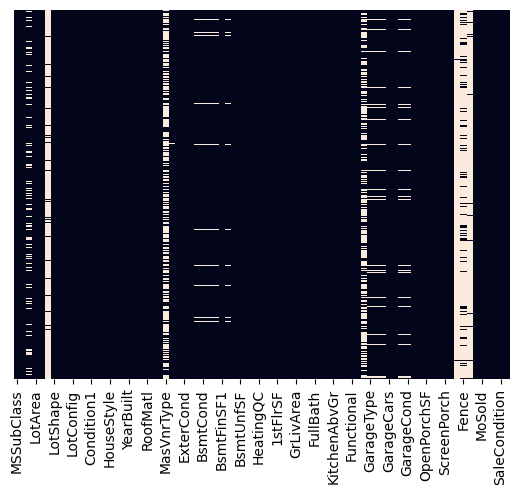

In [183]:
#Creating a heatmap of null values
sns.heatmap(Xtrain.isnull(),yticklabels=False,cbar=False)

In [184]:
percent_missing = Xtrain.isnull().sum() * 100 / len(Xtrain)
percent_missing = percent_missing.to_dict()
for i in percent_missing:
    if percent_missing[i] > 30:
        print(i, percent_missing[i])

Alley 93.76712328767124
MasVnrType 59.726027397260275
FireplaceQu 47.26027397260274
PoolQC 99.52054794520548
Fence 80.75342465753425
MiscFeature 96.3013698630137


<BarContainer object of 19 artists>

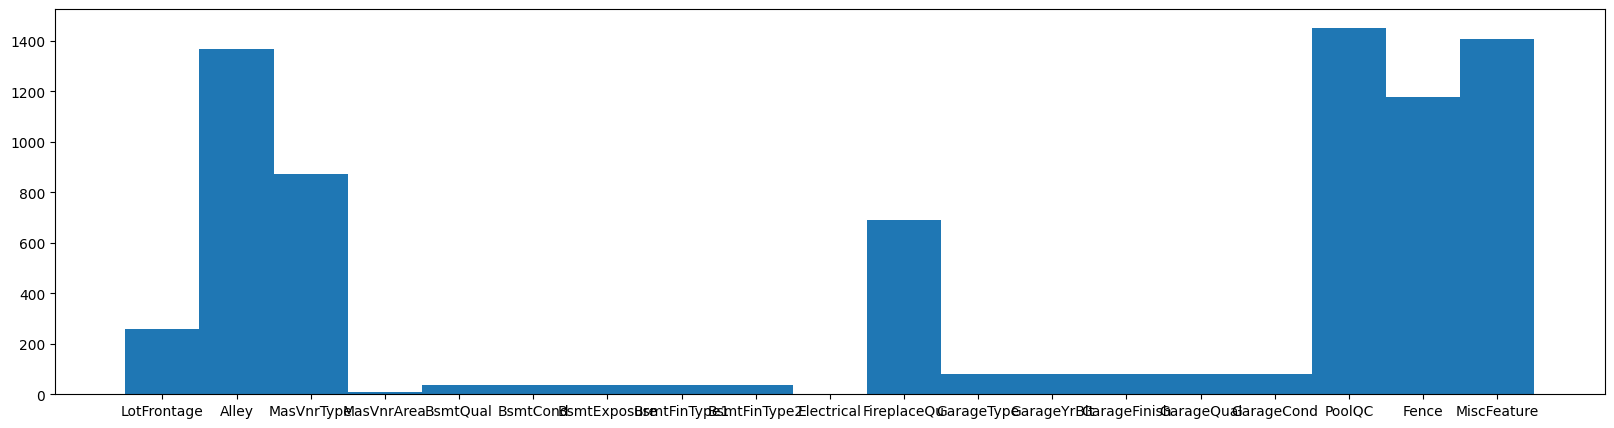

In [185]:
X1 = (Xtrain.isnull().sum()).to_dict()
#print(X1)
#features = lambda x : f"{x} is even" if lx %2==0 else f"{x} is odd"
features = list(X1.keys())
num_null = list(X1.values())
for num in range(len(num_null)):
    if num_null[num] == 0:
       del X1[features[num]]
features1 = list(X1.keys())
num_null1 = list(X1.values())

fig = plt.figure(figsize = (20, 5))
plt.bar(features1,num_null1, width=1)


We remove PoolQC, Fence, MiscFeature and Alley as they have over 80% null values.

In [186]:
Xtrain = Xtrain.drop('PoolQC',axis=1)
Xtrain = Xtrain.drop('Fence',axis=1)
Xtrain = Xtrain.drop('MiscFeature',axis=1)
Xtrain = Xtrain.drop('Alley',axis=1)

Separating features into discrete and continuous types

In [187]:
Quantitative = Xtrain[["LotFrontage", "LotArea", 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                      'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',]].copy()

Catagorical = Xtrain[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                      'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                      'MasVnrType', 'GarageYrBlt',
                      'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                      'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                      'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
                      'GarageQual', 'GarageCond', 'PavedDrive',
                      'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']].copy()
Quantitative.shape, Catagorical.shape


((1460, 18), (1460, 57))

Imputing the Quantitative columns with the mean values and the Catagorical columns with the mode of the classes.

In [188]:
for column in Quantitative.columns:
    Xtrain[column].fillna(Xtrain[column].mean(), inplace=True)

In [189]:
for column in Catagorical.columns:
    Xtrain[column].fillna(Xtrain[column].mode(), inplace=True)

In [221]:
#fix for fillna not automatically working
m1 = Xtrain['FireplaceQu'].mode().values[0]
Xtrain['FireplaceQu'].fillna(m1, inplace=True)
m2 = Xtrain['MasVnrType'].mode().values[0]
Xtrain['MasVnrType'].fillna(m2, inplace=True)
m3 = Xtrain['GarageYrBlt'].mode().values[0]
Xtrain['GarageYrBlt'].fillna(m3, inplace=True)


After removing the NULL values, we will convert the catagorical attributes into an integer representation using one-hot encoding.

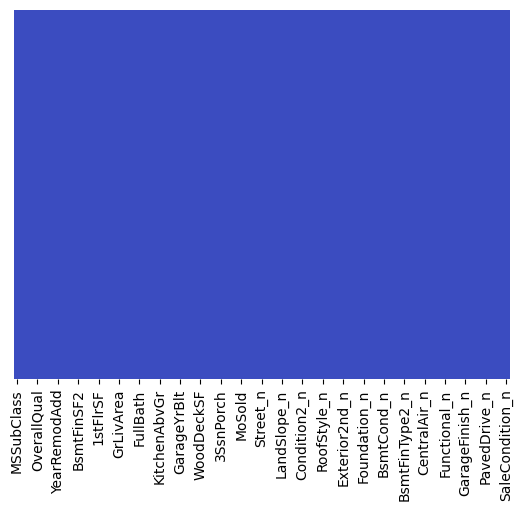

In [222]:
Numerics = LabelEncoder()
Xtrain_n = Xtrain.copy()

#Xtrain.info()

Xtrain_n['MSZoning_n'] = Numerics.fit_transform(Xtrain_n['MSZoning'])
Xtrain_n['Street_n'] = Numerics.fit_transform(Xtrain_n['Street'])
Xtrain_n['LotShape_n'] = Numerics.fit_transform(Xtrain_n['LotShape'])
Xtrain_n['LotConfig_n'] = Numerics.fit_transform(Xtrain_n['LotConfig'])
Xtrain_n['LandSlope_n'] = Numerics.fit_transform(Xtrain_n['LandSlope'])
Xtrain_n['Neighborhood_n'] = Numerics.fit_transform(Xtrain_n['Neighborhood'])
Xtrain_n['Condition1_n'] = Numerics.fit_transform(Xtrain_n['Condition1'])
Xtrain_n['Condition2_n'] = Numerics.fit_transform(Xtrain_n['Condition2'])
Xtrain_n['BldgType_n'] = Numerics.fit_transform(Xtrain_n['BldgType'])
Xtrain_n['HouseStyle_n'] = Numerics.fit_transform(Xtrain_n['HouseStyle'])


Xtrain_n = Xtrain_n.drop(['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                          'Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis='columns')
#Better option for filling of null values is to insert the
#mean of the column.
#Ex.
#Xtrain['LotFrontage'] = Xtrain['LotFrontage'].fillna(Xtrain['LotFrontage'].mean())
Xtrain_n['RoofStyle_n'] = Numerics.fit_transform(Xtrain_n['RoofStyle'])
Xtrain_n['RoofMatl_n'] = Numerics.fit_transform(Xtrain_n['RoofMatl'])
Xtrain_n['Exterior1st_n'] = Numerics.fit_transform(Xtrain_n['Exterior1st'])
Xtrain_n['Exterior2nd_n'] = Numerics.fit_transform(Xtrain_n['Exterior2nd'])
Xtrain_n['ExterQual_n'] = Numerics.fit_transform(Xtrain_n['ExterQual'])
Xtrain_n['ExterCond_n'] = Numerics.fit_transform(Xtrain_n['ExterCond'])
Xtrain_n['Foundation_n'] = Numerics.fit_transform(Xtrain_n['Foundation'])

Xtrain_n = Xtrain_n.drop(['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation'],axis='columns')
Xtrain_n['MasVnrType_n'] = Numerics.fit_transform(Xtrain_n['MasVnrType'])
Xtrain_n['BsmtQual_n'] = Numerics.fit_transform(Xtrain_n['BsmtQual'])
Xtrain_n['BsmtCond_n'] = Numerics.fit_transform(Xtrain_n['BsmtCond'])
Xtrain_n['BsmtExposure_n'] = Numerics.fit_transform(Xtrain_n['BsmtExposure'])
Xtrain_n['BsmtFinType1_n'] = Numerics.fit_transform(Xtrain_n['BsmtFinType1'])
Xtrain_n['BsmtFinType2_n'] = Numerics.fit_transform(Xtrain_n['BsmtFinType2'])
Xtrain_n['Heating_n'] = Numerics.fit_transform(Xtrain_n['Heating'])
Xtrain_n['HeatingQC_n'] = Numerics.fit_transform(Xtrain_n['HeatingQC'])
Xtrain_n['CentralAir_n'] = Numerics.fit_transform(Xtrain_n['CentralAir'])
Xtrain_n['Electrical_n'] = Numerics.fit_transform(Xtrain_n['Electrical'])
Xtrain_n['KitchenQual_n'] = Numerics.fit_transform(Xtrain_n['KitchenQual'])
Xtrain_n['Functional_n'] = Numerics.fit_transform(Xtrain_n['Functional'])
Xtrain_n['FireplaceQu_n'] = Numerics.fit_transform(Xtrain_n['FireplaceQu'])
Xtrain_n['GarageType_n'] = Numerics.fit_transform(Xtrain_n['GarageType'])
Xtrain_n['GarageFinish_n'] = Numerics.fit_transform(Xtrain_n['GarageFinish'])
Xtrain_n['GarageQual_n'] = Numerics.fit_transform(Xtrain_n['GarageQual'])
Xtrain_n['GarageCond_n'] = Numerics.fit_transform(Xtrain_n['GarageCond'])
Xtrain_n['PavedDrive_n'] = Numerics.fit_transform(Xtrain_n['PavedDrive'])
Xtrain_n['YrSold_n'] = Numerics.fit_transform(Xtrain_n['YrSold'])
Xtrain_n['SaleType_n'] = Numerics.fit_transform(Xtrain_n['SaleType'])
Xtrain_n['SaleCondition_n'] = Numerics.fit_transform(Xtrain_n['SaleCondition'])


Xtrain_n = Xtrain_n.drop(['YrSold','SaleType','SaleCondition','PoolArea'],axis='columns')
Xtrain_n = Xtrain_n.drop(['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis='columns')
Xtrain_n = Xtrain_n.drop(['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'],axis='columns')
Xtrain_n = Xtrain_n.drop(['BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional'],axis='columns')
Xtrain_n.head()
#Final check of null values
Xtrain_n.isnull().sum()
#'coolwarm' makes it blue with red dots.
sns.heatmap(Xtrain_n.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
#To drop columns filled entirely with null values
Xtrain_n.dropna(inplace=True)

## To check correlation

<Axes: >

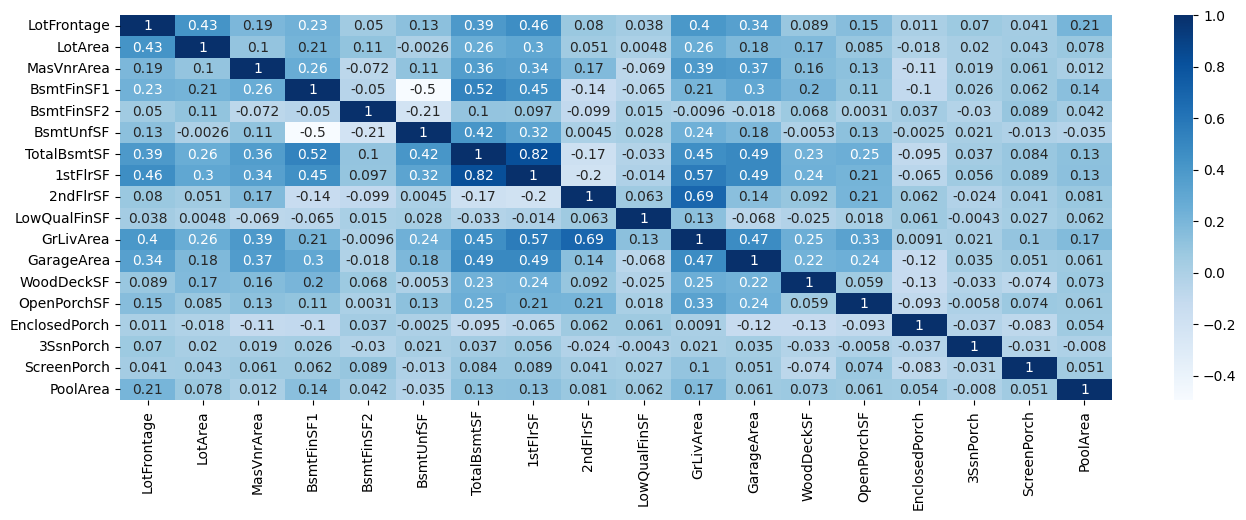

In [241]:
plt.figure(figsize=(16,5))
sns.heatmap(Quantitative.corr(),cmap='Blues',annot=True) 

### Key observations
There are observable linear correlations in the given heat maps.

TotalBsmtSF and 1stFlrSF are examples of quantitative attributes that show correlation.

In [ ]:
#Terrible way to represent
#plt.scatter(range(len(Ytrain)), Ytrain)

# Distributions of various variables
### SalesPrice

Text(0.5, 0, 'Test Price')

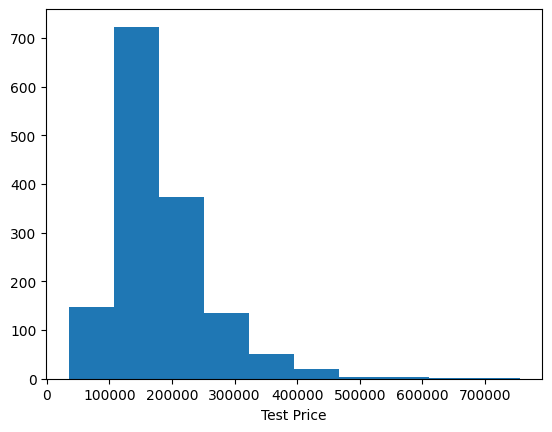

In [129]:
plt.hist(Ytrain)
plt.xlabel('Test Price')

In [242]:
model = LinearRegression()

In [251]:
Xtrain_n.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,MSZoning_n,Street_n,LotShape_n,LotConfig_n,LandSlope_n,Neighborhood_n,Condition1_n,Condition2_n,BldgType_n,HouseStyle_n,RoofStyle_n,RoofMatl_n,Exterior1st_n,Exterior2nd_n,ExterQual_n,ExterCond_n,Foundation_n,MasVnrType_n,BsmtQual_n,BsmtCond_n,BsmtExposure_n,BsmtFinType1_n,BsmtFinType2_n,Heating_n,HeatingQC_n,CentralAir_n,Electrical_n,KitchenQual_n,Functional_n,FireplaceQu_n,GarageType_n,GarageFinish_n,GarageQual_n,GarageCond_n,PavedDrive_n,YrSold_n,SaleType_n,SaleCondition_n
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,208500,3,1,3,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,2,3,3,2,5,1,0,1,4,2,6,2,1,1,4,4,2,2,8,4
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,181500,3,1,3,2,0,24,1,2,0,2,1,1,8,8,3,4,1,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,1,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,223500,3,1,0,4,0,5,2,2,0,5,1,1,12,13,2,4,2,1,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,2,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,140000,3,1,0,0,0,6,2,2,0,5,1,1,13,15,3,4,0,1,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,0,8,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,250000,3,1,0,2,0,15,2,2,0,5,1,1,12,13,2,4,2,1,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,2,8,4


In [252]:
model.fit(Xtrain_n,Ytrain)

LinearRegression()

In [253]:
train_predict = model.predict(Xtrain_n)

In [254]:
model.score(Xtrain_n,Ytrain)

1.0

In [255]:
from sklearn import metrics

In [256]:
metrics.mean_absolute_error(Ytrain, train_predict)

6.019609042583672e-11

In [257]:
metrics.mean_squared_error(Ytrain, train_predict)

7.257324627316201e-21

In [110]:
#Cannot predict test 'cause the columns need to be changed

In [258]:
from sklearn.preprocessing import PolynomialFeatures

In [259]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Xtrain_n)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Ytrain)

LinearRegression()

In [260]:
X_poly.shape

(1460, 2775)

In [261]:
#Perfect! Small error
a = pol_reg.predict(X_poly)
metrics.mean_squared_error(Ytrain,a)

1.52610865707975e-12

In [262]:
Xtest_n = Xtest
Xtest_n.fillna('0',inplace=True)
Xtest_n['MSZoning_n'] = Numerics.fit_transform(Xtest_n['MSZoning'])
Xtest_n['Street_n'] = Numerics.fit_transform(Xtest_n['Street'])
Xtest_n['LotShape_n'] = Numerics.fit_transform(Xtest_n['LotShape'])
Xtest_n['LotConfig_n'] = Numerics.fit_transform(Xtest_n['LotConfig'])
Xtest_n['LandSlope_n'] = Numerics.fit_transform(Xtest_n['LandSlope'])
Xtest_n['Neighborhood_n'] = Numerics.fit_transform(Xtest_n['Neighborhood'])
Xtest_n['Condition1_n'] = Numerics.fit_transform(Xtest_n['Condition1'])
Xtest_n['Condition2_n'] = Numerics.fit_transform(Xtest_n['Condition2'])
Xtest_n['BldgType_n'] = Numerics.fit_transform(Xtest_n['BldgType'])
Xtest_n['HouseStyle_n'] = Numerics.fit_transform(Xtest_n['HouseStyle'])


Xtest_n = Xtest_n.drop(['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis='columns')

Xtest_n['RoofStyle_n'] = Numerics.fit_transform(Xtest_n['RoofStyle'])
Xtest_n['RoofMatl_n'] = Numerics.fit_transform(Xtest_n['RoofMatl'])
Xtest_n['Exterior1st_n'] = Numerics.fit_transform(Xtest_n['Exterior1st'])
Xtest_n['Exterior2nd_n'] = Numerics.fit_transform(Xtest_n['Exterior2nd'])
Xtest_n['ExterQual_n'] = Numerics.fit_transform(Xtest_n['ExterQual'])
Xtest_n['ExterCond_n'] = Numerics.fit_transform(Xtest_n['ExterCond'])
Xtest_n['Foundation_n'] = Numerics.fit_transform(Xtest_n['Foundation'])

Xtest_n = Xtest_n.drop(['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation'],axis='columns')

Xtest_n.fillna('0',inplace=True)                  #filling up all null values
Xtest_n['MasVnrType_n'] = Numerics.fit_transform(Xtest_n['MasVnrType'])
Xtest_n['BsmtQual_n'] = Numerics.fit_transform(Xtest_n['BsmtQual'])
Xtest_n['BsmtCond_n'] = Numerics.fit_transform(Xtest_n['BsmtCond'])
Xtest_n['BsmtExposure_n'] = Numerics.fit_transform(Xtest_n['BsmtExposure'])
Xtest_n['BsmtFinType1_n'] = Numerics.fit_transform(Xtest_n['BsmtFinType1'])
Xtest_n['BsmtFinType2_n'] = Numerics.fit_transform(Xtest_n['BsmtFinType2'])
Xtest_n['Heating_n'] = Numerics.fit_transform(Xtest_n['Heating'])
Xtest_n['HeatingQC_n'] = Numerics.fit_transform(Xtest_n['HeatingQC'])
Xtest_n['CentralAir_n'] = Numerics.fit_transform(Xtest_n['CentralAir'])
Xtest_n['Electrical_n'] = Numerics.fit_transform(Xtest_n['Electrical'])
Xtest_n['KitchenQual_n'] = Numerics.fit_transform(Xtest_n['KitchenQual'])
Xtest_n['Functional_n'] = Numerics.fit_transform(Xtest_n['Functional'])
Xtest_n['FireplaceQu_n'] = Numerics.fit_transform(Xtest_n['FireplaceQu'])
Xtest_n['GarageType_n'] = Numerics.fit_transform(Xtest_n['GarageType'])
Xtest_n['GarageFinish_n'] = Numerics.fit_transform(Xtest_n['GarageFinish'])
Xtest_n['GarageQual_n'] = Numerics.fit_transform(Xtest_n['GarageQual'])
Xtest_n['GarageCond_n'] = Numerics.fit_transform(Xtest_n['GarageCond'])
Xtest_n['PavedDrive_n'] = Numerics.fit_transform(Xtest_n['PavedDrive'])
Xtest_n['Fence_n'] = Numerics.fit_transform(Xtest_n['Fence'])
Xtest_n['YrSold_n'] = Numerics.fit_transform(Xtest_n['YrSold'])
Xtest_n['SaleType_n'] = Numerics.fit_transform(Xtest_n['SaleType'])
Xtest_n['SaleCondition_n'] = Numerics.fit_transform(Xtest_n['SaleCondition'])


Xtest_n = Xtest_n.drop(['PoolQC','Fence','MiscFeature','YrSold','SaleType','SaleCondition','PoolArea'],axis='columns')
Xtest_n = Xtest_n.drop(['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'],axis='columns')
Xtest_n = Xtest_n.drop(['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1'],axis='columns')
Xtest_n = Xtest_n.drop(['BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional'],axis='columns')

In [263]:
Xtest_n.shape,Xtrain_n.shape

((1459, 73), (1460, 73))

In [264]:
X1_poly = poly_reg.fit_transform(Xtest_n)

In [265]:
X1_poly.shape

(1459, 2775)

In [266]:
predict_test = pol_reg.predict(X1_poly)
#metrics.mean_squared_error(Ytest,b)

In [267]:
predict_test

array([ -25.12300206, -139.18735339,   19.31890182, ...,  -36.04517344,
         96.30206579,  -21.68777384])

In [268]:
try1 = np.abs(predict_test)

In [269]:
np.savetxt("Price_predict.csv", try1, delimiter=",")

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
clf = SGDRegressor()

In [ ]:
clf.fit(Xtrain_n,Ytrain)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
clf.predict(Xtrain_n)

array([-4.39955181e+16, -5.82435029e+16, -5.82868498e+16, ...,
       -3.87700400e+16, -6.22018598e+16, -6.53999781e+16])

In [ ]:
try2=clf.predict(Xtest_n)

In [ ]:
try2

array([-6.52414650e+16, -7.32745034e+16, -7.66495913e+16, ...,
       -1.20054928e+17, -5.28529878e+16, -5.11407403e+16])

In [ ]:
np.savetxt("Price_predict(1).csv",try2, delimiter=",")

In [ ]:
try2.shape

(1459,)

In [ ]:
import sklearn.neural_network as nn

In [ ]:
regr = nn.MLPRegressor(max_iter=2000,random_state=5)

In [ ]:
regr.fit(Xtrain_n,Ytrain)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=5, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
predict_nn = regr.predict(Xtrain_n)

In [ ]:
regr.score(Xtrain_n,Ytrain)

0.803878916587122

In [ ]:
metrics.mean_absolute_error(Ytrain, predict_nn)

23508.225079490025

In [ ]:
metrics.mean_squared_error(Ytrain, predict_nn)

1236894210.2146769

In [ ]:
try3 = regr.predict(Xtest_n)

In [ ]:
np.savetxt("Price_predict(1).csv",try3, delimiter=",")